<a href="https://colab.research.google.com/github/avladova/MLSD/blob/main/MLSD2024_Hellinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#https://habr.com/ru/articles/795661/

# Загрузка

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

from scipy.stats import norm

from sklearn import preprocessing
#%pylab inline

In [106]:
ID='1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc'
#sheet_url="https://docs.google.com/spreadsheets/d/1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc/edit#gid=1744952440"
sheet_url="https://docs.google.com/spreadsheets/d/1b4HoOSDn99OIV5Xk-LVyWcO6HAZQNtTRtdDUsE-7WXU/edit#gid=595410935"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
raw=pd.read_csv(url_1)
raw.rename(columns={'Depth of the sole layer, m':'Depth, m','Power of the sole layer, m':'Thickness, m', 'EGE element':'Code of soil', 'Sole description':'Soil description'}, inplace=True)
#url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
#raw=pd.read_csv(url_1)
#raw['Code of soil'] = raw['Code of soil'].astype('int64');
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   km                5869 non-null   int64  
 1   Picket            5869 non-null   int64  
 2   Rider, m          5869 non-null   float64
 3   Depth, m          5869 non-null   float64
 4   Thickness, m      5869 non-null   float64
 5   Code of soil      5859 non-null   float64
 6   Soil description  5843 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 321.1+ KB
None


In [8]:
ID='1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc'
sheet_url="https://docs.google.com/spreadsheets/d/1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc/edit#gid=1744952440"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
raw=pd.read_csv(url_1)
raw.rename(columns={'Depth of the sole layer, m':'Depth, m','Power, m':'Thickness, m', 'Code':'Code of soil', 'Description':'Soil description'}, inplace=True)
print(raw.info())
raw.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   km                593 non-null    int64  
 1   Picket            593 non-null    int64  
 2   Rider, m          593 non-null    float64
 3   Depth, m          593 non-null    float64
 4   Thickness, m      593 non-null    float64
 5   Code of soil      593 non-null    int64  
 6   Soil description  591 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 32.6+ KB
None


,km,Picket,"Rider, m","Depth, m","Thickness, m",Code of soil,Soil description
309,346,3469,95.10,0.1,0.1,60,Почвенно-растительный слой
191,344,3444,55.50,14.5,2.0,204,Суглинок мягкопластичный
491,351,3512,78.56,9.5,2.8,205,Суглинок текучепластичный
155,343,3436,61.00,11.2,10.4,448,Песок мелкий твердомерзлый
58,341,3415,58.00,10.2,2.7,458,Песок пылеватый твердомерзлый


## Корреляции

In [9]:
raw.drop(columns=['km','Rider, m', 'Soil description']).corr()

,Picket,"Depth, m","Thickness, m",Code of soil
Picket,1.000000,-0.030614,-0.073708,-0.255911
"Depth, m",-0.030614,1.000000,0.469286,-0.220055
"Thickness, m",-0.073708,0.469286,1.000000,-0.020978
Code of soil,-0.255911,-0.220055,-0.020978,1.000000


In [10]:
raw.drop(columns=['km','Rider, m', 'Soil description']).corr(method='spearman')

,Picket,"Depth, m","Thickness, m",Code of soil
Picket,1.000000,-0.052822,-0.107634,-0.361035
"Depth, m",-0.052822,1.000000,0.563769,0.061301
"Thickness, m",-0.107634,0.563769,1.000000,0.156892
Code of soil,-0.361035,0.061301,0.156892,1.000000


In [11]:
raw.drop(columns=['km','Rider, m', 'Soil description']).corr(method='kendall')

,Picket,"Depth, m","Thickness, m",Code of soil
Picket,1.000000,-0.035586,-0.073730,-0.246784
"Depth, m",-0.035586,1.000000,0.439135,0.049050
"Thickness, m",-0.073730,0.439135,1.000000,0.115211
Code of soil,-0.246784,0.049050,0.115211,1.000000


# Распределения

In [107]:
df=raw.copy()
df['Distance, m']=df['Picket']+df['Rider, m']*0.01
df.describe()

,km,Picket,"Rider, m","Depth, m","Thickness, m",Code of soil,"Distance, m"
count,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5859.000000,5869.000000
mean,266.650707,2671.025217,48.976027,6.022747,2.790935,376.058713,2671.514978
std,59.706385,597.108476,29.569652,5.358496,3.012000,247.780357,597.151419
min,151.000000,1517.000000,0.000000,0.000000,0.000000,0.000000,1517.198000
25%,216.000000,2160.000000,25.000000,1.300000,0.700000,204.000000,2160.080000
50%,276.000000,2762.000000,50.000000,4.700000,1.800000,309.000000,2762.330000
75%,320.000000,3200.000000,74.500000,10.000000,3.700000,448.000000,3200.508600
max,358.000000,3589.000000,102.000000,30.000000,24.200000,939.000000,3589.400000


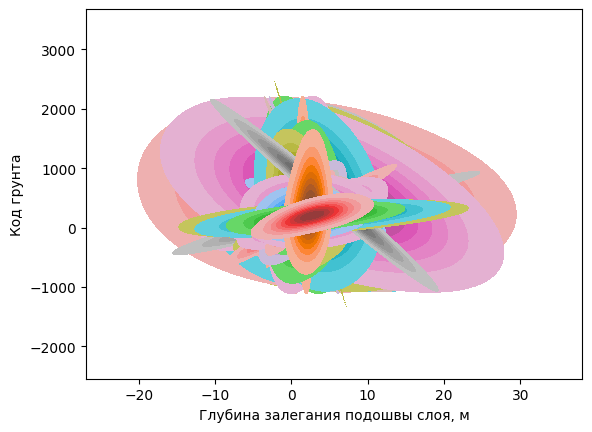

In [56]:
for distance, data in dm.groupby('Distance, m'):
    sns.kdeplot(data=data, x='Thickness, m', y='Code of soil', fill=True, warn_singular=False, bw_adjust=2) #, cbar=True, cbar_kws={'label': 'Density'}, label=f'Distance, m = {distance}')

# Add legend and labels
plt.xlabel('Мощность слоя, м')
plt.ylabel('Код грунта')
plt.show()

In [109]:
dm=df.copy().drop(columns=['km','Picket','Rider, m','Soil description'])
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth, m      5869 non-null   float64
 1   Thickness, m  5869 non-null   float64
 2   Code of soil  5859 non-null   float64
 3   Distance, m   5869 non-null   float64
dtypes: float64(4)
memory usage: 183.5 KB


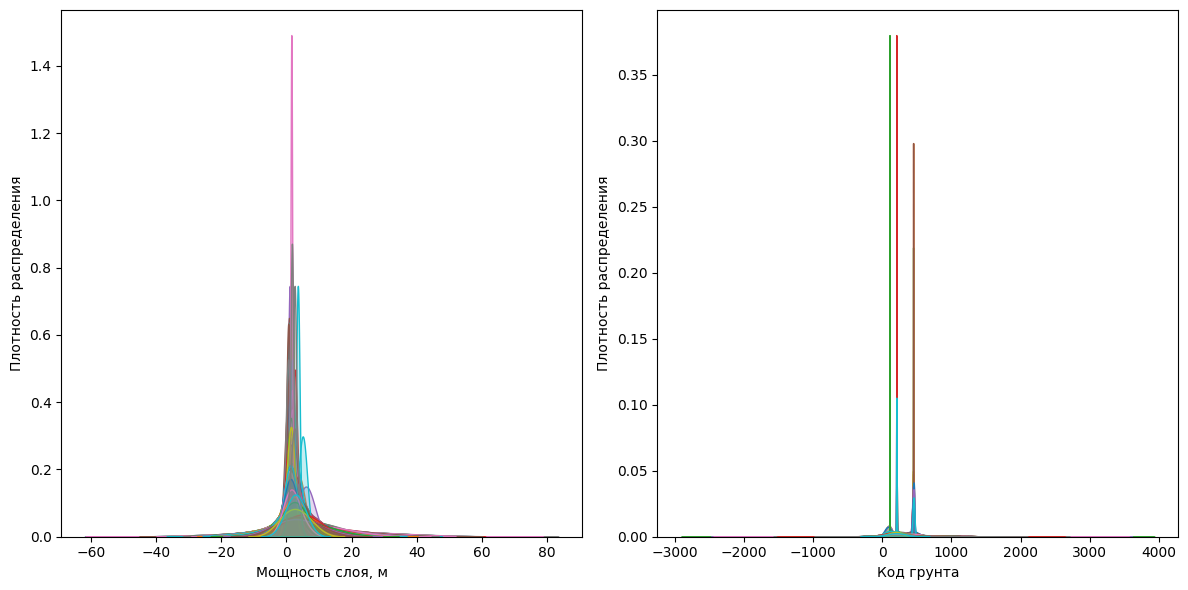

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for distance, data in dm.groupby('Distance, m'):
    sns.kdeplot(data['Thickness, m'], fill=True, bw_adjust=2, warn_singular=False, ax=ax1)
    ax1.set_xlabel('Мощность слоя, м')
    ax1.set_ylabel('Плотность распределения')

    sns.kdeplot(data['Code of soil'], fill=True, bw_adjust=2, warn_singular=False, ax=ax2)
    ax2.set_xlabel('Код грунта')
    ax2.set_ylabel('Плотность распределения')

plt.tight_layout()
plt.show()

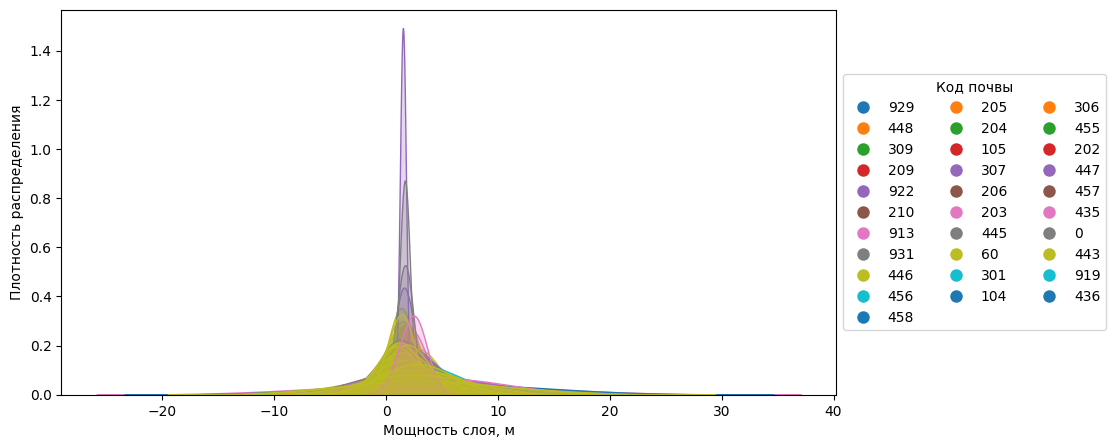

In [95]:
unique_soil_codes = dm['Code of soil'].unique()

# Define a color palette based on the unique soil codes
color_palette = sns.color_palette("tab10", n_colors=len(unique_soil_codes))

fig, ax = plt.subplots(figsize=(10, 5))

for distance, data in dm.groupby('Distance, m'):
    soil_code = data['Code of soil'].iloc[0]  # Get the soil code for coloring
    sns.kdeplot(data['Thickness, m'], fill=True, bw_adjust=2,
                warn_singular=False, color=color_palette[np.where(unique_soil_codes == soil_code)[0][0]], ax=ax)

plt.xlabel('Мощность слоя, м')
plt.ylabel('Плотность распределения')

# Create a legend for soil codes
legend_labels = [f'{code}' for code in unique_soil_codes]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=10) for i in range(len(unique_soil_codes))]
plt.legend(legend_handles, legend_labels, title='Код почвы', loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

plt.show()


In [88]:
dm

,"Depth, m","Thickness, m",Code of soil,"Distance, m",Depth_integer,Soil type
0,2.5,1.9,929,3403.57,2,Торф
1,7.5,5.0,448,3403.57,7,Песок
2,9.0,1.5,309,3403.57,9,Супесь
3,12.0,3.0,209,3403.57,12,Суглинок
4,2.5,2.5,922,3404.50,2,Торф
...,...,...,...,...,...,...
588,0.2,0.2,60,3589.40,0,Почва
589,2.9,2.7,202,3589.40,2,Суглинок
590,8.3,5.4,205,3589.40,8,Суглинок
591,11.5,3.2,307,3589.40,11,Супесь


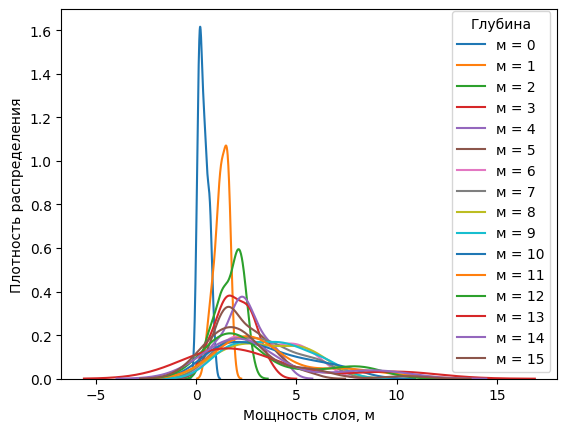

In [79]:
dm['Depth_integer'] = np.floor(dm['Depth, m']).astype(int)

for depth_int, data in dm.groupby('Depth_integer'):
    sns.kdeplot(data['Thickness, m'], label=f'м = {depth_int}', warn_singular=False)

#, bw_adjust=2, fill=True, warn_singular=False)

# Add legend and labels
plt.legend(title='Глубина')
plt.xlabel('Мощность слоя, м')
plt.ylabel('Плотность распределения')
plt.show()

# Расстояния Хеллингера

In [112]:
dtrm=df.copy().drop(columns=['km','Picket','Rider, m','Soil description'])
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth, m      5869 non-null   float64
 1   Thickness, m  5869 non-null   float64
 2   Code of soil  5859 non-null   float64
 3   Distance, m   5869 non-null   float64
dtypes: float64(4)
memory usage: 183.5 KB


In [113]:
# Получение данных из сгруппированного датафрейма
grouped_data = dtrm.groupby('Distance, m')

# Function to calculate Hellinger distance between two normal distributions
def hellinger_distance(mu1, sigma1, mu2, sigma2):
    distance_squared = 1 - np.sqrt(2*sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1/4 * ((mu1 - mu2)**2) / (sigma1 + sigma2))
    return distance_squared

# Calculate Hellinger distance between neighboring groups
hellinger_distances = []
group_keys = list(grouped_data.groups.keys())
for i in range(len(group_keys)-1):
    current_group = grouped_data.get_group(group_keys[i])
    next_group = grouped_data.get_group(group_keys[i+1])

    # Calculate the parameters for the normal distributions of 'Code of soil' and 'Thickness, m'
    mu1, sigma1 = current_group[['Code of soil', 'Thickness, m']].mean()
    mu2, sigma2 = next_group[['Code of soil', 'Thickness, m']].mean()

    # Calculate the Hellinger distance
    distance = hellinger_distance(mu1, sigma1, mu2, sigma2)
    hellinger_distances.append(distance)

# Output the results
for idx, distance_squared in enumerate(hellinger_distances):
    print(f"Hellinger distance squared between group {idx+1} and group {idx+2}: {distance_squared}")


Hellinger distance squared between group 1 and group 2: 1.0
Hellinger distance squared between group 2 and group 3: 1.0
Hellinger distance squared between group 3 and group 4: 1.0
Hellinger distance squared between group 4 and group 5: 1.0
Hellinger distance squared between group 5 and group 6: 1.0
Hellinger distance squared between group 6 and group 7: 1.0
Hellinger distance squared between group 7 and group 8: -0.4661493551890843
Hellinger distance squared between group 8 and group 9: 1.0
Hellinger distance squared between group 9 and group 10: 1.0
Hellinger distance squared between group 10 and group 11: 1.0
Hellinger distance squared between group 11 and group 12: 1.0
Hellinger distance squared between group 12 and group 13: 1.0
Hellinger distance squared between group 13 and group 14: 1.0
Hellinger distance squared between group 14 and group 15: 0.9999999999999999
Hellinger distance squared between group 15 and group 16: 1.0
Hellinger distance squared between group 16 and group 17

In [124]:
from statistics import mode
min(hellinger_distances)
np.median(hellinger_distances)
mode(hellinger_distances)
np.percentile(hellinger_distances, 25)

1.0

In [105]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Предположим, что исходный DataFrame dtrm содержит данные

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Применение StandardScaler к данным 'Code of soil' и 'Thickness, m'
dtrm[['Code of soil', 'Thickness, m']] = scaler.fit_transform(dtrm[['Code of soil', 'Thickness, m']])
grouped_data = dtrm.groupby('Distance, m')


# Расчет расстояния Хеллингера между соседними группами
hellinger_distances = []
group_keys = list(grouped_data.groups.keys())
for i in range(len(group_keys) - 1):
    current_group = grouped_data.get_group(group_keys[i])
    next_group = grouped_data.get_group(group_keys[i + 1])

    # Рассчет параметров для нормальных распределений 'Code of soil' и 'Thickness, m'
    mu1, sigma1 = current_group[['Code of soil', 'Thickness, m']].mean()
    mu2, sigma2 = next_group[['Code of soil', 'Thickness, m']].mean()

    # Рассчет расстояния Хеллингера
    distance = hellinger_distance(mu1, sigma1, mu2, sigma2)
    hellinger_distances.append(distance)

# Вывод результатов
for idx, distance_squared in enumerate(hellinger_distances):
    print(f"Hellinger distance squared between group {idx + 1} and group {idx + 2}: {distance_squared}")


<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * 

Hellinger distance squared between group 1 and group 2: 0.6708432462165115
Hellinger distance squared between group 2 and group 3: 0.1187285018657549
Hellinger distance squared between group 3 and group 4: nan
Hellinger distance squared between group 4 and group 5: 0.6330423706471635
Hellinger distance squared between group 5 and group 6: 0.7755450154111866
Hellinger distance squared between group 6 and group 7: 0.4233529779489652
Hellinger distance squared between group 7 and group 8: nan
Hellinger distance squared between group 8 and group 9: 0.3858622654676145
Hellinger distance squared between group 9 and group 10: nan
Hellinger distance squared between group 10 and group 11: nan
Hellinger distance squared between group 11 and group 12: 0.5485061628000774
Hellinger distance squared between group 12 and group 13: 0.6558359333877981
Hellinger distance squared between group 13 and group 14: 0.3974140029894838
Hellinger distance squared between group 14 and group 15: 0.3859284093954648

<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1 + sigma2)) * np.exp(-1 / 4 * ((mu1 - mu2) ** 2) / (sigma1 + sigma2))
<ipython-input-105-00c9f511859b>:15: RuntimeWarning: invalid value encountered in sqrt
  distance_squared = 1 - np.sqrt(2 * 

# Rорреляция

## Неравномерная сетка

<Figure size 4500x800 with 0 Axes>

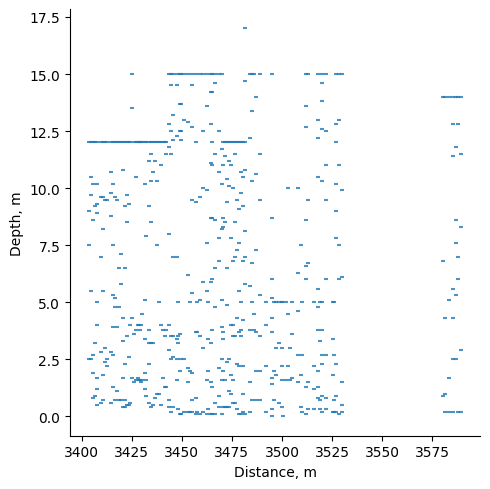

In [9]:
# Plot the grid based on the Distance and Depth of the sole layer
plt.figure(figsize=(45, 8))
sns.lmplot(x='Distance, m', y='Depth, m', data=df, fit_reg=False, scatter_kws={"s": 10}, markers="_")
plt.show()

<Axes: xlabel='None-None', ylabel='Distance, m'>

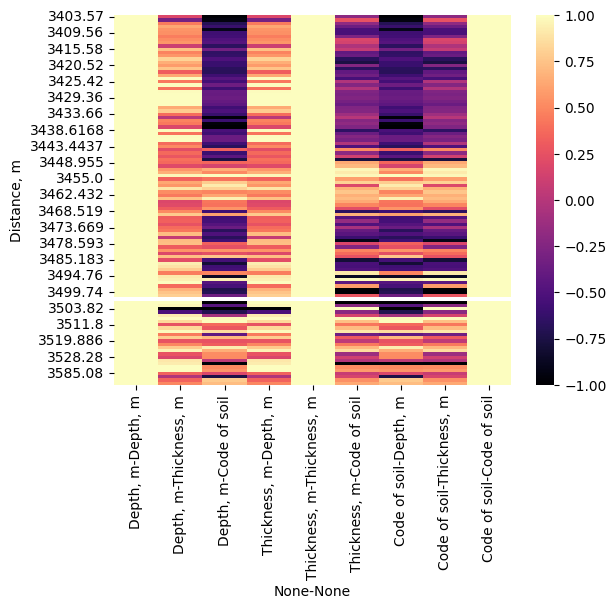

In [28]:
#dtfr=df.copy() #.set_index(['Distance, m','Depth, m'])
data=df[['Distance, m','Depth, m','Thickness, m', 'Code of soil']].copy().dropna()
# Calculate the correlation matrix
along_distance=data.groupby(['Distance, m']).corr().unstack()

sns.heatmap(along_distance, cmap='magma')  #"YlGnBu")

<Axes: xlabel='None-None', ylabel='Depth, m'>

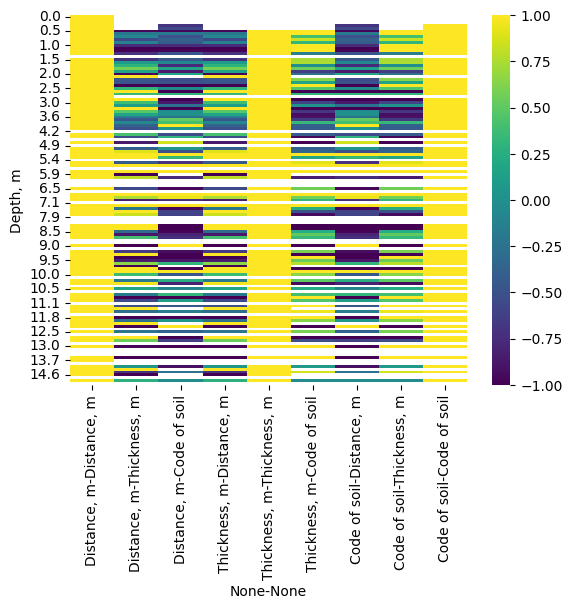

In [29]:
along_depth=data.groupby(['Depth, m']).corr().unstack()
sns.heatmap(along_depth, cmap='viridis')

In [31]:
#nan по обеим координатам
data.groupby(['Distance, m', 'Depth, m']).corr().unstack()

Thickness, m              Code of soil             
                     Thickness, m Code of soil Thickness, m Code of soil
Distance, m Depth, m                                                    
3403.57     2.5               NaN          NaN          NaN          NaN
            7.5               NaN          NaN          NaN          NaN
            9.0               NaN          NaN          NaN          NaN
            12.0              NaN          NaN          NaN          NaN
3404.50     2.5               NaN          NaN          NaN          NaN
...                           ...          ...          ...          ...
3589.40     0.2               NaN          NaN          NaN          NaN
            2.9               NaN          NaN          NaN          NaN
            8.3               NaN          NaN          NaN          NaN
            11.5              NaN          NaN          NaN          NaN
            14.0              NaN          NaN          NaN          NaN

[593 rows x 4 columns]

In [14]:
# Вычисление расстояния Хёллингера
def d_hellinger(u, v):
    return np.sqrt(1 - np.exp(-0.25 * np.sum((np.sqrt(u) - np.sqrt(v))**2)))

In [ ]:
data=df[['Distance, m','Depth, m','Thickness, m', 'Code of soil']].copy().dropna()
# Calculate the correlation matrix
along_distance=data.groupby(['Distance, m'])

sns.heatmap(along_distance, cmap='magma')  #"YlGnBu")

In [26]:
data=dtfr[['Thickness, m', 'Code of soil']].dropna()
u=data[['Thickness, m']]
v=data[['Code of soil']]
# Вычисление матрицы расстояний
distances = cdist(u.values,v.values, metric=d_hellinger)
u

,,"Thickness, m"
"Distance, m","Depth, m",
3495.0000,0.0,0.0
3500.5640,0.0,0.0
3507.7267,0.0,0.0
3509.2400,0.0,0.0
2034.5000,0.2,0.2
...,...,...
3517.8700,0.8,0.8
2173.0200,0.7,0.6
2174.0670,0.6,0.5


<Axes: >

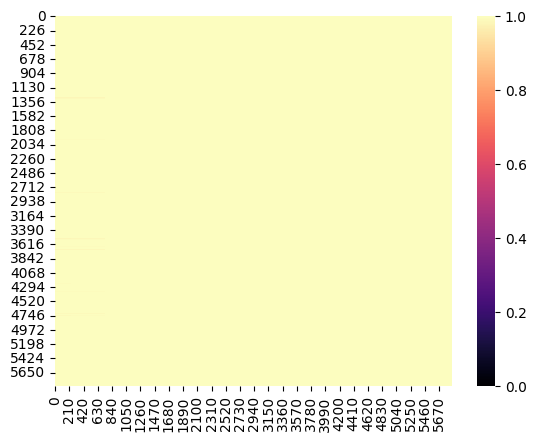

In [29]:
sns.heatmap(distances, cmap='magma')  #"YlGnBu")

In [28]:
distances

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.34278725, 0.34278725, 0.34278725, ..., 1.        , 1.        ,
        1.        ],
       [0.34278725, 0.34278725, 0.34278725, ..., 1.        , 1.        ,
        1.        ],
       [0.30848433, 0.30848433, 0.30848433, ..., 1.        , 1.        ,
        1.        ]])